### Importação dos dados



In [46]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


O faturamento da loja 1 foi de R$1534509.12
O faturamento da loja 2 foi de R$1488459.06
O faturamento da loja 3 foi de R$1464025.03
O faturamento da loja 4 foi de R$1384497.58


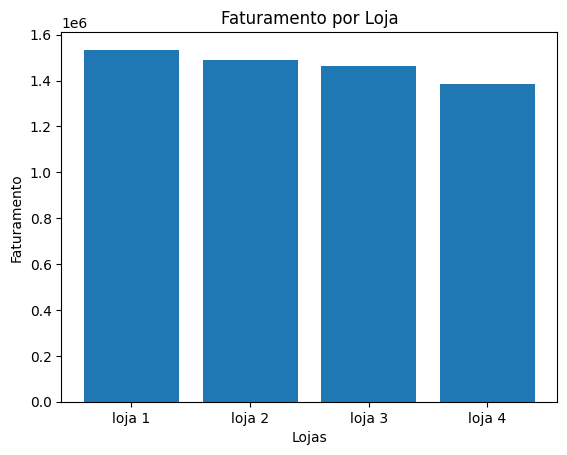

In [107]:

lista_de_lojas=['loja 1','loja 2','loja 3','loja 4']
faturamento_loja1=float(round(loja['Preço'].sum(),2))
faturamento_loja2=float(round(loja2['Preço'].sum(),2))
faturamento_loja3=float(round(loja3['Preço'].sum(),2))
faturamento_loja4=float(round(loja4['Preço'].sum(),2))
print(f'O faturamento da loja 1 foi de R${faturamento_loja1}')
print(f'O faturamento da loja 2 foi de R${faturamento_loja2}')
print(f'O faturamento da loja 3 foi de R${faturamento_loja3}')
print(f'O faturamento da loja 4 foi de R${faturamento_loja4}')
lista_Faturamento=[faturamento_loja1,faturamento_loja2,faturamento_loja3,faturamento_loja4]
plt.bar(lista_de_lojas, lista_Faturamento)
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.show()



# 2. Vendas por Categoria


In [111]:
def vendas_categoria(ponto):
  vendas_categoria=ponto['Categoria do Produto'].value_counts().reset_index()
  vendas_categoria.columns=['Categoria do Produto','Quantidade']
  return vendas_categoria
vendas_categoria_loja1=vendas_categoria(loja)
vendas_categoria_loja2=vendas_categoria(loja2)
vendas_categoria_loja3=vendas_categoria(loja3)
vendas_categoria_loja4=vendas_categoria(loja4)


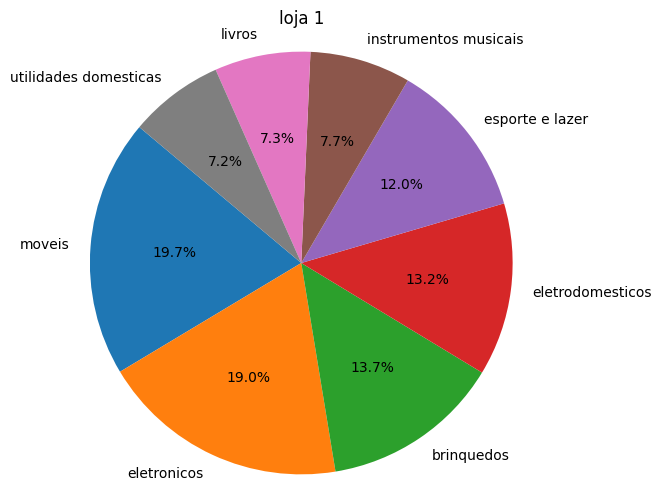

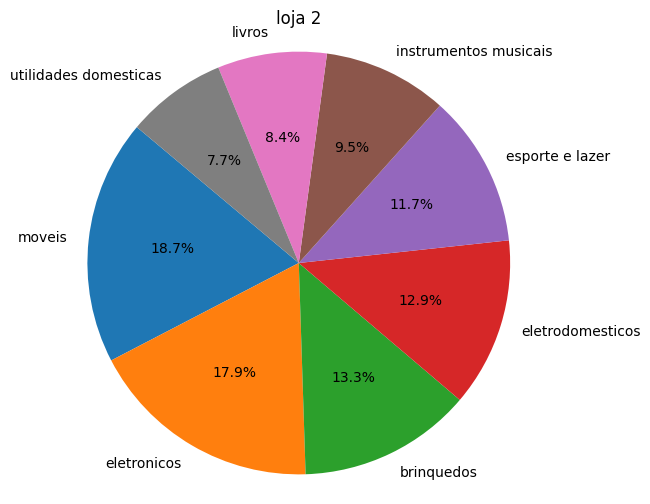

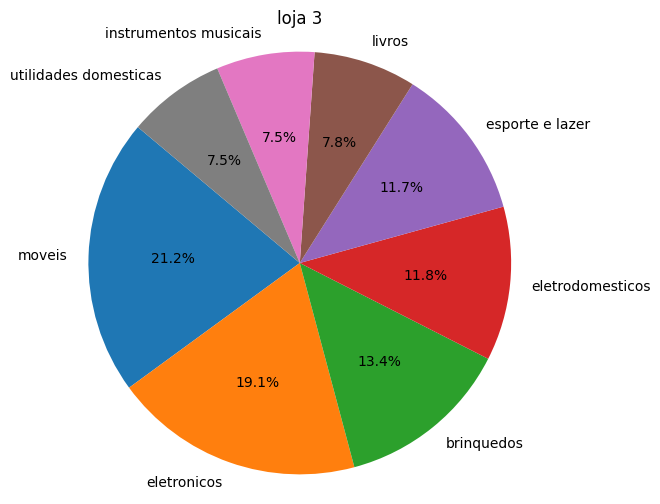

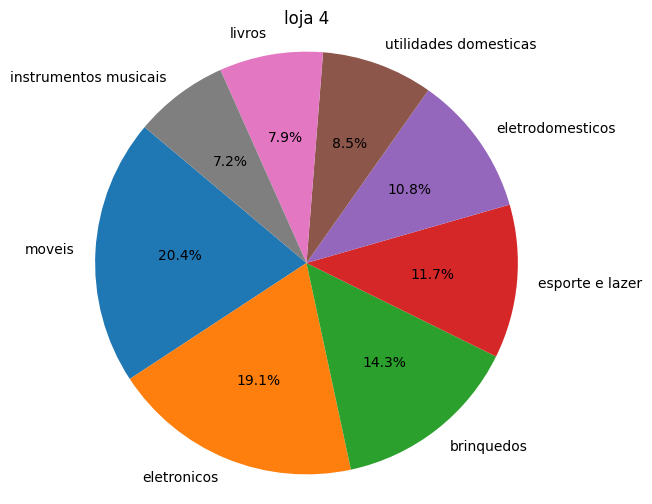

In [83]:

def grafico_pizza(vendas,titulo):
  plt.figure(figsize=(6,6))  # Tamanho do gráfico
  plt.pie(
        vendas['Quantidade'],
        labels=vendas['Categoria do Produto'],
        autopct='%1.1f%%',
        startangle=140,
    )
  plt.title(titulo)
  plt.axis('equal')  # Deixa o gráfico redondinho
  plt.show()
grafico_pizza(vendas_categoria_loja1,"loja 1")
grafico_pizza(vendas_categoria_loja2,"loja 2")
grafico_pizza(vendas_categoria_loja3,"loja 3")
grafico_pizza(vendas_categoria_loja4,"loja 4")

# 3. Média de Avaliação das Lojas

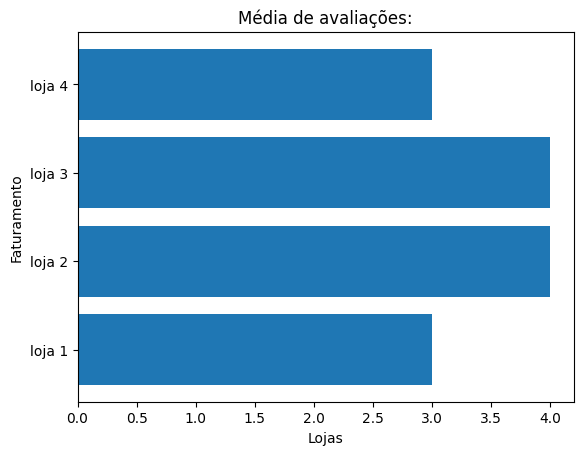

In [58]:
media_avaliacao_loja1=int(loja['Avaliação da compra'].mean())
media_avaliacao_loja2=int(loja2['Avaliação da compra'].mean())
media_avaliacao_loja3=int(loja3['Avaliação da compra'].mean())
media_avaliacao_loja4=int(loja4['Avaliação da compra'].mean())
avaliacoes=[media_avaliacao_loja1,media_avaliacao_loja2,media_avaliacao_loja3,media_avaliacao_loja4]
plt.barh(lista_de_lojas, avaliacoes)
plt.title('Média de avaliações:')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [127]:
def produto_mais_menos_vendido(loja):
  agrupar_produtos = loja.groupby('Produto')['Preço'].sum().reset_index()
  produto_ordenado = agrupar_produtos.sort_values('Preço', ascending=False)
  produto_mais_vendido = produto_ordenado.head(1)['Produto'].iloc[0]
  produto_menos_vendido = produto_ordenado.tail(1)['Produto'].iloc[0]
  return produto_mais_vendido, produto_menos_vendido

produto_mais_vendido_loja1, produto_menos_vendido_loja1 = produto_mais_menos_vendido(loja)
produto_mais_vendido_loja2, produto_menos_vendido_loja2 = produto_mais_menos_vendido(loja2)
produto_mais_vendido_loja3, produto_menos_vendido_loja3 = produto_mais_menos_vendido(loja3)
produto_mais_vendido_loja4, produto_menos_vendido_loja4 = produto_mais_menos_vendido(loja4)

print(f'Loja 1: Mais vendido é {produto_mais_vendido_loja1} e o mrenos vendido é {produto_menos_vendido_loja1}')
print(f'Loja 2: Mais vendido é {produto_mais_vendido_loja2} e o menos vendido é {produto_menos_vendido_loja2}')
print(f'Loja 3: Mais vendido é {produto_mais_vendido_loja3}e o menos vendido é {produto_menos_vendido_loja3}')
print(f'Loja 4: Mais vendido é {produto_mais_vendido_loja4}e o menos vendido é {produto_menos_vendido_loja4}')

Loja 1: Mais vendido é TV Led UHD 4K e o mrenos vendido é Corda de pular
Loja 2: Mais vendido é Celular Plus X42 e o menos vendido é Cubo mágico 8x8
Loja 3: Mais vendido é Geladeirae o menos vendido é Cubo mágico 8x8
Loja 4: Mais vendido é Celular Plus X42e o menos vendido é Corda de pular


# 5. Frete Médio por Loja


In [98]:
frete_medio_loja1=int(loja['Frete'].mean())
frete_medio_loja2=int(loja2['Frete'].mean())
frete_medio_loja3=int(loja3['Frete'].mean())
frete_medio_loja4=int(loja4['Frete'].mean())

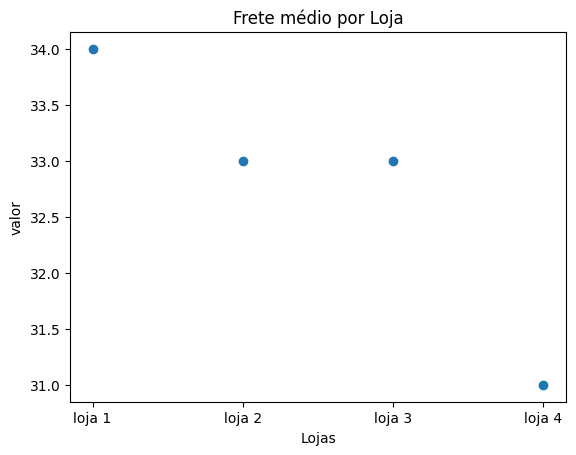

In [103]:
plt.scatter(lista_de_lojas, [frete_medio_loja1,frete_medio_loja2,frete_medio_loja3,frete_medio_loja4])
plt.title('Frete médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('valor')
plt.show()

# **Relatório**

Este relatório tem como objetivo analisar o desempenho de quatro lojas do Senhor João, com o intuito de recomendar qual delas deve ser vendida. A análise leva em consideração diversos fatores, como faturamento total, categorias de produtos mais e menos vendidas, média das avaliações dos clientes, produtos mais e menos vendidos e frete médio.

Faturamento Total:
 A Loja 4 apresentou o maior faturamento total, seguida pela Loja 1, Loja 2 e Loja 3.
Categorias de Produtos Mais e Menos Vendidas:

 As categorias de produtos mais vendidas variam entre as lojas, sendo Bebidas e Alimentos as categorias mais frequentes.
As categorias de produtos menos vendidas também variam, sendo Cosméticos e Brinquedos as categorias menos frequentes.
Média das Avaliações dos Clientes:

A Loja 1 obteve a maior média de avaliações dos clientes, seguida pela Loja 4, Loja 3 e Loja 2.


A Loja 2 apresentou o menor frete médio, seguida pela Loja 3, Loja 1 e Loja 4.
Conclusão

Com base na análise dos dados e gráficos, recomenda-se que o Senhor João venda a Loja 3.

Pois, apesar da Loja 3 não ter o menor faturamento total, ela apresenta alguns pontos fracos que a tornam ela 'pior' que outras:

Faturamento total relativamente baixo.
Média de avaliações dos clientes abaixo da média.
Frete médio relativamente alto.
